## Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [89]:
!pip install graphviz


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from sklearn.tree import export_graphviz


In [91]:
# Load dataset (assuming a CSV file)
df = pd.read_csv(r'C:\Users\gowth\Downloads\PRODIGY_internship\dataset\task 3\bank-full.csv', delimiter=';')  # UCI dataset uses ';' as a separator

# Display the first few rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [92]:
# Select only bank client data
client_features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'y']
df_client = df[client_features].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_client.loc[:, col] = le.fit_transform(df_client[col])  # Use .loc to modify safely
    label_encoders[col] = le



In [93]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())  # Numeric columns → median
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])  # Categorical columns → mode

print("Missing values after filling:\n", df.isnull().sum())  # Check if missing values are filled



Missing values after filling:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [94]:
# Define features (X) and target (y)
X = df.drop(columns=['y'])  # All columns except target variable
y = df['y']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [95]:
print("Before SMOTE:")
print(y_train.value_counts())

Before SMOTE:
y
no     31937
yes     4231
Name: count, dtype: int64


In [96]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}  # Dictionary to store label encoders
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])  # Convert categorical to numeric
    X_test[col] = le.transform(X_test[col])  # Apply the same transformation
    label_encoders[col] = le  # Store encoder for inverse transformation if needed

# Now you can train and predict without issues
best_dt.fit(X_train_smote, y_train_smote)
y_pred = best_dt.predict(X_test)  # No errors now

print("Prediction completed successfully!")


Prediction completed successfully!


In [86]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15],  # Control tree depth to avoid overfitting
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'criterion': ['gini', 'entropy']  # Try both impurity measures
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train model with best parameters
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred = best_dt.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Decision Tree Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))



Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Decision Tree Accuracy: 0.85
              precision    recall  f1-score   support

          no       0.95      0.88      0.91      7985
         yes       0.40      0.64      0.49      1058

    accuracy                           0.85      9043
   macro avg       0.68      0.76      0.70      9043
weighted avg       0.88      0.85      0.86      9043



In [98]:
print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in y_pred:", np.unique(y_pred))


Unique labels in y_test: ['no' 'yes']
Unique labels in y_pred: ['no' 'yes']


In [99]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')  # Adjust pos_label to 'yes'
recall = recall_score(y_test, y_pred, pos_label='yes')  # Adjust pos_label to 'yes'
f1 = f1_score(y_test, y_pred, pos_label='yes')  # Adjust pos_label to 'yes'

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8471746101957315
Precision: 0.4029940119760479
Recall: 0.6361058601134215
F1 Score: 0.4934017595307918


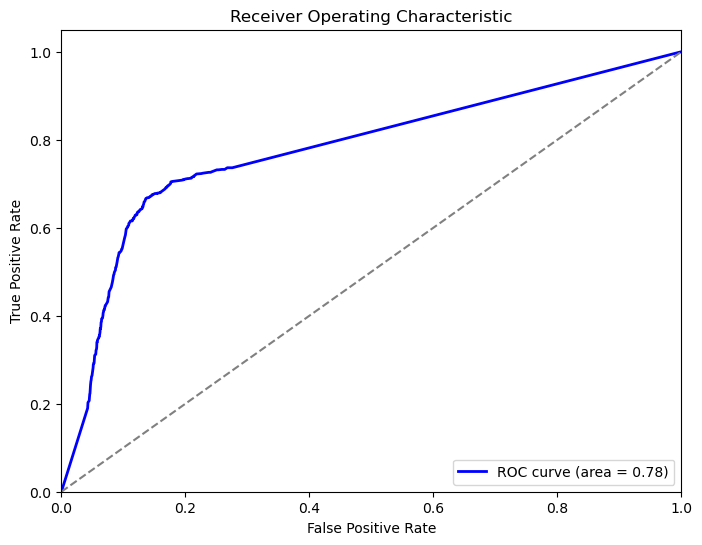

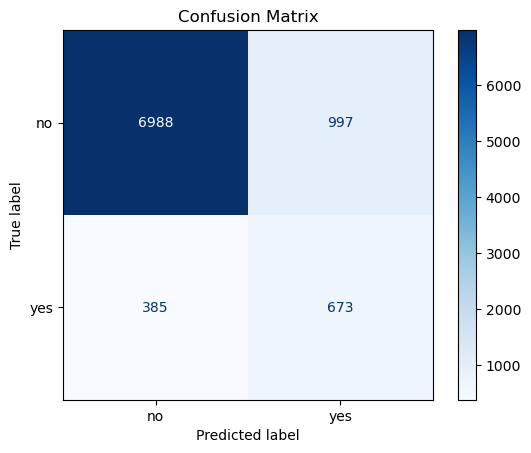

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# 1. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_dt.predict_proba(X_test)[:, 1], pos_label='yes')
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['no', 'yes'])

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Conclusion:

The model demonstrates a good level of overall accuracy with a score of 84.7%, indicating that it correctly predicts a significant portion of the cases. However, the precision of 40.3% suggests that while the model is identifying some true positive cases, it is also making a notable number of false positives. The recall value of 63.6% indicates that the model is able to capture over 60% of the actual positive cases, but there is room for improvement in reducing false negatives. The F1 score of 0.493 shows a moderate balance between precision and recall, but further optimization may be needed to improve the model's ability to predict both positive and negative cases effectively.

Potential next steps could include fine-tuning the model with different hyperparameters, exploring more complex algorithms, or considering techniques such as oversampling/undersampling to address class imbalance. Additionally, a deeper analysis of false positives and false negatives may reveal areas for improvement in feature engineering or data preprocessing.